In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
df = pd.read_csv('example.tsv')

In [6]:
df

,seq,type
0,TCAGATTCAACTG,0
1,GATGATTTCTCCAA,1
2,GATGATTTCTC,1
3,TCAGATTCAACTG,0
4,TCAGATTCAACTGG,1


In [7]:
#Taken from internet
# converts to lower case, changes any non 'acgt' characters to 'n'
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^acgt]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [10]:
#Taken form internet
# function to one-hot encode a DNA sequence string
# non 'acgt' bases (n) are 0000
# returns a L x 4 numpy array
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded

In [14]:
test_sequence = 'AAAAAA'
one_hot_encoder(string_to_array(test_sequence))

array([], shape=(6, 0), dtype=int32)

In [15]:
string_to_array(test_sequence)

array(['a', 'a', 'a', 'a', 'a', 'a'], dtype='<U1')

In [116]:
len(df)

5

In [118]:
df['corrected'] = ''

x = 0
while x < len(df['seq']):

    for i in df['seq']:
        if len(i) <= 13:
            df['corrected'][x] = i + (('N')* (13 - len(i)))
        else:
            df['corrected'][x] = i[:13]

        x+=1

/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [119]:
df['encoded'] = ''

x = 0
while x < len(df['corrected']):
    for i in df['corrected']:
        df['encoded'][x] = one_hot_encoder(string_to_array(i))
        x+=1

/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/umar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: Setti

In [120]:
df

,seq,type,corrected,encoded
0,TCAGATTCAACTG,0,TCAGATTCAACTG,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [..."
1,GATGATTTCTCCAA,1,GATGATTTCTCCA,"[[0, 0, 1], [1, 0, 0], [0, 0, 0], [0, 0, 1], [..."
2,GATGATTTCTC,1,GATGATTTCTCNN,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
3,TCAGATTCAACTG,0,TCAGATTCAACTG,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [..."
4,TCAGATTCAACTGG,1,TCAGATTCAACTG,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [..."


In [121]:
df2 = df[['encoded', 'type']]
df2

,encoded,type
0,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [...",0
1,"[[0, 0, 1], [1, 0, 0], [0, 0, 0], [0, 0, 1], [...",1
2,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...",1
3,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [...",0
4,"[[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [...",1


In [122]:
df2['encoded'][0]

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [123]:
df2['encoded'][2]

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [372]:
# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqRecord import SeqRecord
from Bio import SeqUtils

In [373]:
# Importing the dataset
dataset = pd.read_csv('fib2.csv')

In [374]:
#for fib2.cvs only

dataset.loc[dataset['Genome type'] == 'ssRNA(+)', 'Genome type'] = 1
dataset.loc[dataset['Genome type'] == 'ssRNA(-)', 'Genome type'] = 0

In [375]:
# #take only + and - ssRNAs

# dataset = dataset.loc[dataset['Genome type'] != 'dsRNA'].loc[dataset['Genome type'] != 'unknown RNA']

# #sort
# dataset = dataset.sort_values(by='Genome type').reset_index(drop = True)

# #take 39x2 rows.
# dataset = dataset.loc[:77]

# #change plus to 1 and minus to 0
# dataset.loc[dataset['Genome type'] == 'plus ssRNA', 'Genome type'] = 1
# dataset.loc[dataset['Genome type'] == 'minus ssRNA', 'Genome type'] = 0

make features

In [376]:
#feature 1: length
dataset['F1'] = [len(i) for i in dataset['Seq'].to_list()]

In [377]:
#orf_translator function to find orfs and translate them

a = Seq(dataset.loc[0,'Seq'], IUPAC.unambiguous_dna)
rec = SeqRecord(a)
table = 11
min_pro_len = 20

def orf_translator(record, table, min_pro_len):
    s1 = []
    s2 = []
    for strand, nuc in [(+1, record.seq), (-1, record.seq.reverse_complement())]:
        for frame in range(3):
            length = 3 * ((len(record)-frame) // 3) #Multiple of three
            for pro in nuc[frame:frame+length].translate(table).split("*"):
                if len(pro) >= min_pro_len:
                    if strand == 1:
                        s1.append(pro)
                    else:
                        s2.append(pro)
    return s1,s2

#orf_translator(rec, 11, 20)

In [378]:
#feature 2: number of orfs on strand 1
#feature 3: number of orfs in strand 2
#feature 4: mean protein length on strand 1
#feature 5: mean protein length on strand 2
#feature 6: GC content
#feature 7: no idea what this feature is

f2, f3, f4, f5, f6, f7 = [],[],[],[],[],[]

for i in dataset['Seq'].to_list():
    a = SeqRecord(Seq(i))
    (s1, s2) = orf_translator(a, 11, 15)
    f2.append(len(s1))
    f3.append(len(s2))
    f4.append(np.mean([len(i) for i in s1]))
    f5.append(np.mean([len(i) for i in s2]))
    f6.append(SeqUtils.GC(a.seq))
    f7.append(sum(SeqUtils.GC_skew(a.seq)))
    
dataset['F2'] = f2
dataset['F3'] = f3
dataset['F4'] = f4
dataset['F5'] = f5
dataset['F6'] = f6
dataset['F7'] = f7

In [379]:
dataset.loc[dataset['F4'].isnull(), 'F4'] = 0
dataset.loc[dataset['F5'].isnull(), 'F5'] = 0

In [380]:
#Splitting features and labels
X = dataset.loc[:, ['F2', 'F3']].values.astype(float)
y = dataset.iloc[:, 1].values.astype(float)

In [381]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [382]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [383]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [384]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [385]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [386]:
cm

array([[21, 12],
       [16, 14]], dtype=int64)

In [387]:
#did not fix visualization errors. Too difficult for now.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


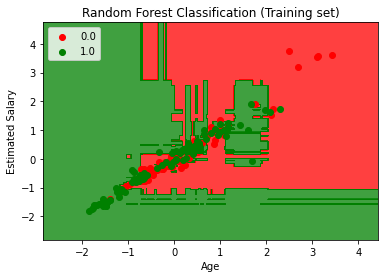

In [370]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


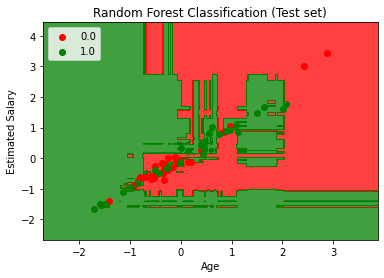

In [371]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


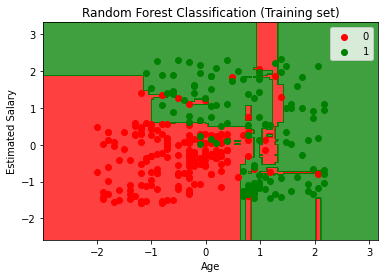

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


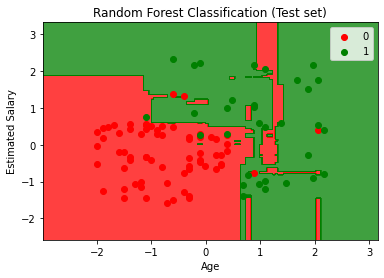

In [140]:
#original code from superdatascience/machine-learning

# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [141]:
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)